### Long/Short ETHUSD strategy

I want to develop a strategy where I can go long and short ETH on a daily time scale. I am going to use the alpaca API data to do this reserch

Problem statement: Predict whether there will be a positive or negative return on a 3 day holding period? 
* The reason that I want to use a 3 day holding period is because I do not want to hold a position for longer than this and also I will be flagged as a day trader if I trade within 1 day though. 
* Let's see what we can do

In [31]:
from alpaca.data.historical import CryptoHistoricalDataClient, StockHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest, StockBarsRequest
from alpaca.data.timeframe import TimeFrame

import datetime
import os
import matplotlib.pyplot as plt

api_key = os.environ['ALPACA_PAPER_TRADING_KEY_ID']
secret_key = os.environ['ALPACA_PAPER_TRADING_SECRET_KEY']

Retrieving the historical data. 
We are looking at the ETF SPY over the period of 12/1/2015 to now. Alpaca has history going back this far for us to look at. However, we could look at something much farther back through yfinance or something like that. However, I want to use the data coming from here

In [34]:
client = StockHistoricalDataClient(api_key=api_key, secret_key=secret_key)
product = 'SPY'

request = StockBarsRequest(
    symbol_or_symbols=product, 
    start = datetime.datetime(2015, 1, 1), 
    timeframe=TimeFrame.Day
)

bars = client.get_stock_bars(request_params = request)

bars_df = bars.df.droplevel(level = 0, axis = 0)

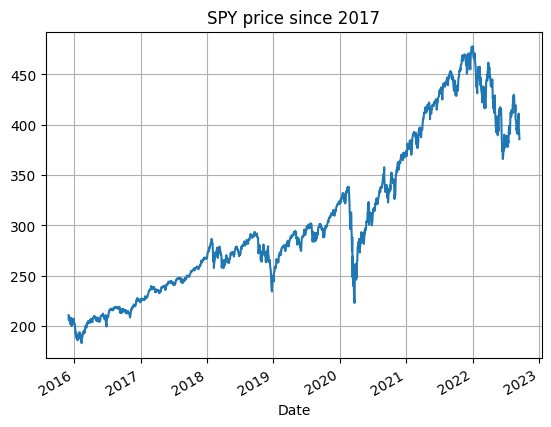

In [35]:
bars_df['close'].plot()
plt.title("SPY price since 2017")
plt.xlabel("Date")
plt.grid(True)
plt.show()